# Demo 04 - Pandas & Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import random

In [5]:
my_dict = {'a': 1, 'b': 2, 'c': 3}

for key, val in my_dict.items():
    print(key, val)



a 1
b 2
c 3


In [6]:
my_dict.items()

dict_items([('a', 1), ('b', 2), ('c', 3)])

## Numpy

In [9]:
np.full(5, True)

array([ True,  True,  True,  True,  True])

**Question:** How many True's are there?

In [10]:
sum(np.full(5, True))

5

In [11]:
np.count_nonzero(np.full(5, True))

5



## DataFrames



### Constructing a DataFrame

##### Empty dataframe

In [12]:
pd.DataFrame()

""


**Adding columns to an empty dataframe**

In [19]:
tmp_df = pd.DataFrame()

# make 2 arrays and one list
list_one = [i for i in range(20)]
array_one = np.random.randn(20)
array_two = np.random.randn(20)

# add each as a column to tmp_df

tmp_df['list_one'] = list_one
tmp_df = tmp_df.assign(array_one= array_one)
tmp_df['array_two'] = array_two

tmp_df

,list_one,array_one,array_two
0,0,1.237590,0.209123
1,1,0.809038,-0.408899
2,2,0.598984,-0.396768
3,3,-0.209623,0.785126
4,4,-0.252639,0.999177
5,5,0.907073,0.710066
6,6,1.332012,-1.205170
7,7,-1.421389,0.950677
8,8,2.057564,0.606140
9,9,-0.103403,-1.464756


In [15]:
list_one, array_one, array_two

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 array([-0.06792094, -0.52226341, -0.53900791,  0.31400508, -0.61281357,
         2.12348666,  0.42716935, -1.17688464, -0.45655588,  1.5502337 ,
        -1.77249167,  1.52917126, -0.0244278 ,  1.81825492, -0.73940056,
         0.78058076, -0.25270089, -0.82447391, -0.97035612, -0.49375988]),
 array([ 1.34906682, -0.6896601 ,  0.52535481,  0.17318108,  0.99038185,
         0.36919145, -0.2324218 ,  1.55793741, -0.23407939,  0.59062805,
         1.45528761,  0.00288616,  1.10794422, -2.24393566,  0.33212725,
        -0.53086716, -0.75220731, -0.59423064,  1.7885091 ,  0.85530788]))

### Pudding Film Dialogue Data

The data we will work with today comes from https://pudding.cool/2017/03/film-dialogue/

> Lately, Hollywood has been taking so much shit for rampant sexism and racism. The prevailing theme: white men dominate movie roles.

> But it’s all rhetoric and no data, which gets us nowhere in terms of having an informed discussion. How many movies are actually about men? What changes by genre, era, or box-office revenue? What circumstances generate more diversity?

> We didn’t set out trying to prove anything, but rather compile real data. We framed it as a census rather than a study. So we Googled our way to 8,000 screenplays and matched each character’s lines to an actor. From there, we compiled the number of words spoken by male and female characters across roughly 2,000 films, arguably the largest undertaking of script analysis, ever.

In [20]:
pd.read_csv("data/Pudding-Film-Dialogue-Clean.csv")

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280
...,...,...,...,...,...,...,...,...,...
23042,Beauty and the Beast,1991,Lumiere,man,1063,0.104636,56.0,452.0,9254
23043,Beauty and the Beast,1991,Maurice,man,1107,0.108967,71.0,452.0,9254
23044,Beauty and the Beast,1991,Monsieur D'Arqu,man,114,0.011222,58.0,452.0,9254
23045,Beauty and the Beast,1991,Mrs. Potts,woman,564,0.055517,66.0,452.0,9254


In [10]:
df = pd.read_csv("data/Pudding-Film-Dialogue-Clean.csv")
df.head(5)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


In [22]:
df.shape

(23047, 9)

**Question:** What are the different types in each column?

In [23]:
df.dtypes

title                      object
release_year                int64
character                  object
gender                     object
words                       int64
proportion_of_dialogue    float64
age                       float64
gross                     float64
script_id                   int64
dtype: object

**Question:** This dataframe is pretty big, so lets just sample 1,000 examples and use that instead

In [60]:
df = df.sample(5000)
df.shape

(5000, 9)

In [26]:
df.head(5)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
20827,The Hunger Games,2012,Gale Hawthorne,man,436,0.051911,22.0,445.0,8029
16562,Woman in Gold,2015,Young Maria Alt,woman,929,0.079185,30.0,34.0,5515
1860,Legally Blonde,2001,Brooke Taylor W,woman,342,0.034587,25.0,146.0,1093
19287,The Devil's Rejects,2005,News Reporter,man,151,0.008482,50.0,22.0,7364
15050,Star Trek III: The Search for Spock,1984,Sulu,man,260,0.036979,47.0,197.0,5028


In [27]:
df.tail(5)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
8698,Man on the Moon,1999,Budd Friedman,man,128,0.007508,NaN,59.0,2833
1082,Escape from L.A.,1996,Cuervo Jones,man,474,0.096933,44.0,49.0,892
7783,Interview with the Vampire: The Vampire Chroni...,1994,Santiago,man,708,0.030671,48.0,218.0,2622
21076,Hot Stuff,1979,Charles,man,268,0.033058,49.0,NaN,8157
17250,Wrong Turn,2003,Evan,man,177,0.031630,19.0,22.0,6190


### Listing columns

**Question:** On your own using the documentation, find the two ways we can list the columns.

*Hint* One way is a dataframe function and the other is an attribute/instance


In [28]:
df.keys()

Index(['title', 'release_year', 'character', 'gender', 'words',
       'proportion_of_dialogue', 'age', 'gross', 'script_id'],
      dtype='object')

In [29]:
df.columns

Index(['title', 'release_year', 'character', 'gender', 'words',
       'proportion_of_dialogue', 'age', 'gross', 'script_id'],
      dtype='object')

In [33]:
np.all(df.columns == df.keys())

True

In [34]:
df.keys()

Index(['title', 'release_year', 'character', 'gender', 'words',
       'proportion_of_dialogue', 'age', 'gross', 'script_id'],
      dtype='object')

### Accessing columns

3 options:

- `df.get(<column name>)`
- `df[<column name>]` - access like a collection
- `df.<column name>` - access like a attribute/method 

In [35]:
# try first option here
df.get('gender')

20827      man
16562    woman
1860     woman
19287      man
15050      man
         ...  
8698       man
1082       man
7783       man
21076      man
17250      man
Name: gender, Length: 1000, dtype: object

In [36]:
# try second option here
df['gender']

20827      man
16562    woman
1860     woman
19287      man
15050      man
         ...  
8698       man
1082       man
7783       man
21076      man
17250      man
Name: gender, Length: 1000, dtype: object

In [44]:
# try third option here
df.gender

11474      man
6431       man
672      woman
1504     woman
19328    woman
         ...  
14790      man
21162      man
731      woman
20295      man
22748    woman
Name: gender, Length: 5000, dtype: object

In [38]:
set([1,2,3,4,1])

{1, 2, 3, 4}

In [43]:
set(df.get('gender'))

{'?', 'man', 'woman'}

In [47]:
df['gender'].unique()

array(['man', 'woman', '?'], dtype=object)

**FInd number of instances that had each of these genders**

In [46]:
df['gender'].value_counts()

man      3496
woman    1503
?           1
Name: gender, dtype: int64

### Accessing rows

In [48]:
df.index

Int64Index([11474,  6431,   672,  1504, 19328,  2095,  8357, 15681,  8654,
            14221,
            ...
            19692,  1058, 10071, 12582,  6268, 14790, 21162,   731, 20295,
            22748],
           dtype='int64', length=5000)

In [49]:
## Access by index label

df.loc[0]

KeyError: 0

In [50]:
## Access by location

df.iloc[0]

title                       War Horse
release_year                     2011
character                 Grandfather
gender                            man
words                             828
proportion_of_dialogue       0.099988
age                              62.0
gross                            87.0
script_id                        3680
Name: 11474, dtype: object

In [55]:
df.reset_index(drop=True, inplace=True)

In [56]:
df.loc[0]

title                       War Horse
release_year                     2011
character                 Grandfather
gender                            man
words                             828
proportion_of_dialogue       0.099988
age                              62.0
gross                            87.0
script_id                        3680
Name: 0, dtype: object

In [57]:
df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,War Horse,2011,Grandfather,man,828,0.099988,62.0,87.0,3680
1,The Family Man,2000,Kenny,man,102,0.003468,26.0,122.0,2263
2,Changeling,2008,Nurse,woman,175,0.013387,NaN,43.0,795
3,Heat,1995,Lillian,woman,124,0.024228,NaN,134.0,996
4,Deja Vu,2006,Beth,woman,260,0.017176,NaN,85.0,7386
...,...,...,...,...,...,...,...,...,...
4995,Secretariat,2010,Lucien Laurin,man,1088,0.116801,57.0,65.0,4928
4996,Joy,2015,Johgny,man,701,0.048970,NaN,57.0,8196
4997,City of Joy,1992,Poomina,woman,167,0.012032,NaN,30.0,809
4998,22 Jump Street,2014,Dr. Murphy,man,236,0.023728,44.0,204.0,7834


### Sorting dataframe

In [58]:
df.keys()

Index(['title', 'release_year', 'character', 'gender', 'words',
       'proportion_of_dialogue', 'age', 'gross', 'script_id'],
      dtype='object')

**Question:** What column should we sort by?

In [68]:
sorted_df = df.sort_values('release_year', ascending=False)
sorted_df.reset_index(drop=True) 

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,Me Him Her,2015,Old Man,man,110,0.011718,NaN,NaN,8233
1,Joy,2015,Toots,woman,743,0.051904,NaN,57.0,8196
2,Southpaw,2015,Maureen Hope,woman,464,0.041113,37.0,54.0,7836
3,Carol,2015,Jack Taft,man,216,0.023116,NaN,NaN,5390
4,Mortdecai,2015,Sir Graham,man,164,0.017906,NaN,7.0,7332
...,...,...,...,...,...,...,...,...,...
4995,Frankenstein,1931,Elizabeth,woman,425,0.111872,21.0,298.0,8521
4996,Frankenstein,1931,Doctor Waldman,man,844,0.222164,49.0,298.0,8521
4997,The Last Flight,1931,Cary Lockwood,man,2527,0.323891,36.0,NaN,1086
4998,The Cocoanuts,1929,Bob,man,668,0.077928,42.0,NaN,4031


In [69]:
sorted_df = df.sort_values('release_year', ascending=False).reset_index(drop=True) 
sorted_df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,Me Him Her,2015,Old Man,man,110,0.011718,NaN,NaN,8233
1,Joy,2015,Toots,woman,743,0.051904,NaN,57.0,8196
2,Southpaw,2015,Maureen Hope,woman,464,0.041113,37.0,54.0,7836
3,Carol,2015,Jack Taft,man,216,0.023116,NaN,NaN,5390
4,Mortdecai,2015,Sir Graham,man,164,0.017906,NaN,7.0,7332
...,...,...,...,...,...,...,...,...,...
4995,Frankenstein,1931,Elizabeth,woman,425,0.111872,21.0,298.0,8521
4996,Frankenstein,1931,Doctor Waldman,man,844,0.222164,49.0,298.0,8521
4997,The Last Flight,1931,Cary Lockwood,man,2527,0.323891,36.0,NaN,1086
4998,The Cocoanuts,1929,Bob,man,668,0.077928,42.0,NaN,4031


In [73]:
df.sort_values([ 'title', 'release_year'], ascending=False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
3551,xXx,2002,Yelena,woman,998,0.120459,27.0,211.0,1497
3552,xXx,2002,Yorgi,man,1189,0.143512,36.0,211.0,1497
3548,xXx,2002,Toby Lee Shaver,man,318,0.038383,26.0,211.0,1497
3545,xXx,2002,El Jefe,man,209,0.025226,58.0,211.0,1497
17589,Zodiac,2007,Belli'S Houseke,woman,107,0.007301,NaN,41.0,6491
...,...,...,...,...,...,...,...,...,...
3647,12 Years a Slave,2013,Treach,man,252,0.012839,NaN,60.0,1517
3643,12 Years a Slave,2013,Sam,man,114,0.005808,NaN,60.0,1517
3632,12 Years a Slave,2013,Ford,man,1019,0.051916,37.0,60.0,1517
3604,10 Things I Hate About You,1999,Patrick Verona,man,3346,0.170020,20.0,65.0,1512


Let's make title ascending and year descending

In [75]:
df.sort_values('title', ascending=True).sort_values('release_year', ascending=False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
19199,Mortdecai,2015,Sir Graham,man,164,0.017906,NaN,7.0,7332
20724,Minions,2015,Narrator,man,617,0.170066,64.0,346.0,7986
20079,Sicario,2015,Us Marshal,man,289,0.041921,NaN,48.0,7740
15874,Beasts of No Nation,2015,Deputy,man,129,0.019131,NaN,NaN,5380
15878,Beasts of No Nation,2015,Preacher,man,185,0.027436,NaN,NaN,5380
...,...,...,...,...,...,...,...,...,...
1841,The Last Flight,1931,Cary Lockwood,man,2527,0.323891,36.0,NaN,1086
21852,Frankenstein,1931,Doctor Waldman,man,844,0.222164,49.0,298.0,8521
21853,Frankenstein,1931,Elizabeth,woman,425,0.111872,21.0,298.0,8521
12339,The Cocoanuts,1929,Bob,man,668,0.077928,42.0,NaN,4031


**Question:** What two columns should we sort by?

Return type of dataframe functions

In [76]:
df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
13821,The Lost Son,1999,Friedman,man,185,0.009864,43.0,NaN,4564
2112,The Matrix Reloaded,2003,Gregory,man,326,0.106850,NaN,405.0,1143
4054,The Amityville Asylum,2013,Nancy,woman,621,0.057617,NaN,NaN,1647
12660,Encrypt,2003,Lapierre,man,220,0.027493,38.0,NaN,4163
19906,Push,2009,Kira Hudson,woman,768,0.155971,23.0,36.0,7682
...,...,...,...,...,...,...,...,...,...
16393,The Great Gatsby,2013,Myrtle Wilson,woman,147,0.013997,37.0,155.0,5489
21647,Red Heat,1988,Lt. Stobbs,man,677,0.076906,27.0,74.0,8417
4162,Anonymous,2011,Richard Burbage,man,129,0.011547,NaN,4.0,1667
4887,"Bodies, Rest & Motion",1993,Elizabeth,woman,292,0.022590,18.0,1.0,1870


### Querying 

**Question:** Find all movies from 15 years ago and older

**Answer** 
1. access the age column
2. 

In [82]:
ages = []
for age in df['age']:
    if age >= 15:
        ages.append(age)
#ages

In [84]:
sum(df['age'] >= 15)

3886

In [87]:
(df['age'] >= 15).value_counts(normalize=True)

True     0.7772
False    0.2228
Name: age, dtype: float64

**Add a new column indicating if the movie is old or not**

In [94]:
#df['old_movie'] =  (2020 - df['release_year']) >= 15
#df
df['movie_age'] = 2021 - df['release_year']
df['old_movie'] >= 15
df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
13821,The Lost Son,1999,Friedman,man,185,0.009864,43.0,NaN,4564,True,22
2112,The Matrix Reloaded,2003,Gregory,man,326,0.106850,NaN,405.0,1143,True,18
4054,The Amityville Asylum,2013,Nancy,woman,621,0.057617,NaN,NaN,1647,False,8
12660,Encrypt,2003,Lapierre,man,220,0.027493,38.0,NaN,4163,True,18
19906,Push,2009,Kira Hudson,woman,768,0.155971,23.0,36.0,7682,False,12
...,...,...,...,...,...,...,...,...,...,...,...
16393,The Great Gatsby,2013,Myrtle Wilson,woman,147,0.013997,37.0,155.0,5489,False,8
21647,Red Heat,1988,Lt. Stobbs,man,677,0.076906,27.0,74.0,8417,True,33
4162,Anonymous,2011,Richard Burbage,man,129,0.011547,NaN,4.0,1667,False,10
4887,"Bodies, Rest & Motion",1993,Elizabeth,woman,292,0.022590,18.0,1.0,1870,True,28


**Question:** Make a new dataframe that has movies of just this certain age

In [97]:
df[df['movie_age'] >= 15]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
13821,The Lost Son,1999,Friedman,man,185,0.009864,43.0,NaN,4564,True,22
2112,The Matrix Reloaded,2003,Gregory,man,326,0.106850,NaN,405.0,1143,True,18
12660,Encrypt,2003,Lapierre,man,220,0.027493,38.0,NaN,4163,True,18
18565,Scooby-Doo,2002,Shaggy,man,2479,0.301142,32.0,229.0,7058,True,19
7231,Hannah and Her Sisters,1986,Elliot,man,4704,0.144765,53.0,94.0,2472,True,35
...,...,...,...,...,...,...,...,...,...,...,...
1835,The Last Boy Scout,1991,Milo,man,1082,0.074013,34.0,122.0,1085,True,30
5369,Chaos,2005,Bank Manager,man,112,0.006908,NaN,NaN,1985,True,16
21647,Red Heat,1988,Lt. Stobbs,man,677,0.076906,27.0,74.0,8417,True,33
4887,"Bodies, Rest & Motion",1993,Elizabeth,woman,292,0.022590,18.0,1.0,1870,True,28


In [99]:
old_movies_df = df[df['movie_age'] >= 15]
old_movies_df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
13821,The Lost Son,1999,Friedman,man,185,0.009864,43.0,NaN,4564,True,22
2112,The Matrix Reloaded,2003,Gregory,man,326,0.106850,NaN,405.0,1143,True,18
12660,Encrypt,2003,Lapierre,man,220,0.027493,38.0,NaN,4163,True,18
18565,Scooby-Doo,2002,Shaggy,man,2479,0.301142,32.0,229.0,7058,True,19
7231,Hannah and Her Sisters,1986,Elliot,man,4704,0.144765,53.0,94.0,2472,True,35
...,...,...,...,...,...,...,...,...,...,...,...
1835,The Last Boy Scout,1991,Milo,man,1082,0.074013,34.0,122.0,1085,True,30
5369,Chaos,2005,Bank Manager,man,112,0.006908,NaN,NaN,1985,True,16
21647,Red Heat,1988,Lt. Stobbs,man,677,0.076906,27.0,74.0,8417,True,33
4887,"Bodies, Rest & Motion",1993,Elizabeth,woman,292,0.022590,18.0,1.0,1870,True,28


Let's look at the indices

**Question:** What do we notice about these indices?

Let's update our indices

**Question:** What method do you think we can use?

In [ ]:
df.reset_index?

Let's not include the original index

In [ ]:
df.reset_index?

#### Querying on Multiple Conditions

In [102]:
df[
    (df['release_year'] < 1950) # condition 1
    & # and 
    (df['gender'] == 'woman') # condition 2
]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
13719,The Leopard Man,1943,Eloise,woman,320,0.038996,21.0,NaN,4520,True,78
9033,Mr. Blandings Builds His Dream House,1948,Joan Blandings,woman,708,0.024212,12.0,NaN,2952,True,73
13464,Isle of the Dead,1945,Miss Wollsten,woman,789,0.101728,NaN,NaN,4437,True,76
9045,Mr. Deeds Goes to Town,1936,Babe Bennett,woman,4206,0.129895,36.0,NaN,2954,True,85
8845,Meet John Doe,1941,Mrs. Mitchell,woman,294,0.009251,55.0,NaN,2884,True,80
8844,Meet John Doe,1941,Mrs. Brewster,woman,198,0.006230,66.0,NaN,2884,True,80
19540,The Lost Weekend,1945,Mrs. Deveridge,woman,252,0.023943,66.0,NaN,7494,True,76
19619,She Wore a Yellow Ribbon,1949,Abby Allshard,woman,368,0.063911,44.0,NaN,7526,True,72
12118,The Body Snatcher,1945,Maidservant,woman,109,0.009955,31.0,NaN,3949,True,76
15290,The Thin Man,1934,Nora Charles,woman,2358,0.150411,29.0,NaN,5115,True,87


In [103]:
df[
    (df['release_year'] < 1950) # condition 1
    | # or 
    (df['release_year'] > 1970) # condition 2
]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
13821,The Lost Son,1999,Friedman,man,185,0.009864,43.0,NaN,4564,True,22
2112,The Matrix Reloaded,2003,Gregory,man,326,0.106850,NaN,405.0,1143,True,18
4054,The Amityville Asylum,2013,Nancy,woman,621,0.057617,NaN,NaN,1647,False,8
12660,Encrypt,2003,Lapierre,man,220,0.027493,38.0,NaN,4163,True,18
19906,Push,2009,Kira Hudson,woman,768,0.155971,23.0,36.0,7682,False,12
...,...,...,...,...,...,...,...,...,...,...,...
16393,The Great Gatsby,2013,Myrtle Wilson,woman,147,0.013997,37.0,155.0,5489,False,8
21647,Red Heat,1988,Lt. Stobbs,man,677,0.076906,27.0,74.0,8417,True,33
4162,Anonymous,2011,Richard Burbage,man,129,0.011547,NaN,4.0,1667,False,10
4887,"Bodies, Rest & Motion",1993,Elizabeth,woman,292,0.022590,18.0,1.0,1870,True,28


"|" for or

In [ ]:
df

### Values in a column

**Question:** Based on everything we've seen so far, how can we determine the set of values that are in a column?

<details>
<summary>Hint</summary>
<b>1. Accessing the column; 2. convert the column (Series) to a set</b>  
</details>

In [ ]:
#skip

In [ ]:
#skip

`unique()`

In [ ]:
df['gender'].unique()

**Question:** How many rows have their gender assigned as `woman`, `man`, or `?`

(note: 1st using everything we know so far, 2nd using my favoritve method)

In [106]:
df[
    (df['release_year'] < 1950) # condition 1
    | # or 
    (df['release_year'] > 1970) # condition 2
]['old_movie'].value_counts(normalize=True)

True     0.62105
False    0.37895
Name: old_movie, dtype: float64


### Grouping 

Let's group by gender

In [107]:
gender_groups = df.groupby('gender')
gender_groups

Now let's find the mean/average values of the other columns for each gender

In [108]:
gender_groups.mean()

,release_year,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
gender,,,,,,,,
?,1991.000000,224.000000,0.003807,78.000000,145.000000,2682.000000,1.000000,30.000000
man,1997.529512,949.917308,0.088848,44.955389,113.777891,4142.042772,0.647277,23.470488
woman,1999.110590,853.373324,0.082522,37.289116,96.156972,4185.646783,0.591153,21.889410


**What just happened?**

1. The table’s rows are split into groups according to gender. 
    - All of the rows whose gender is 'man' are placed into one group,
    - All of the rows whose gender is 'woman' are placed into another group.
    - All of the rows whose gender is `?` are placed into another group

2. Each group is aggregated into a single row by average the value of entries in each of the group’s columns.

3. The resulting rows are combined to form a new table, with one row for every group.

**Other aggregation methods:**
- .median()
- .max()
- .min()
- .count()

In [112]:
gender_count_df = df.groupby('gender').min()['proportion_of_dialogue']
gender_count_df

gender
?        0.003807
man      0.001950
woman    0.001537
Name: proportion_of_dialogue, dtype: float64

In [110]:
df[df['character'] == "Zilke'S Assista"]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
12785,The Fifth Estate,2013,Zilke'S Assista,woman,186,0.018255,45.0,3.0,4208,False,8


Let's group by two columns: `gender` and `age` and find the mean

In [113]:
gender_age_mean_df = df.groupby(['gender', 'old_movie']).mean()
gender_age_mean_df

release_year       words  proportion_of_dialogue        age  \
gender old_movie                                                                
?      True        1991.000000  224.000000                0.003807  78.000000   
man    False       2010.495554  885.852870                0.089124  47.494577   
       True        1990.463877  984.828194                0.088698  43.710106   
woman  False       2010.409836  860.873770                0.086336  37.460888   
       True        1991.295918  848.185941                0.079884  37.173542   

                       gross    script_id  movie_age  
gender old_movie                                      
?      True       145.000000  2682.000000  30.000000  
man    False       81.883912  4979.477769  10.504446  
       True       132.679307  3685.696035  30.536123  
woman  False       75.271536  4794.032787  10.590164  
       True       111.625520  3764.880952  29.704082

**Question:** What are the indices of `gender_age_mean_df`? 

In [116]:
current_multi_index = gender_age_mean_df.index
current_multi_index

MultiIndex([(    '?',  True),
            (  'man', False),
            (  'man',  True),
            ('woman', False),
            ('woman',  True)],
           names=['gender', 'old_movie'])

In [117]:
current_multi_index.levels

FrozenList([['?', 'man', 'woman'], [False, True]])

In [120]:
gender_age_mean_df.reset_index()

,gender,old_movie,release_year,words,proportion_of_dialogue,age,gross,script_id,movie_age
0,?,True,1991.000000,224.000000,0.003807,78.000000,145.000000,2682.000000,30.000000
1,man,False,2010.495554,885.852870,0.089124,47.494577,81.883912,4979.477769,10.504446
2,man,True,1990.463877,984.828194,0.088698,43.710106,132.679307,3685.696035,30.536123
3,woman,False,2010.409836,860.873770,0.086336,37.460888,75.271536,4794.032787,10.590164
4,woman,True,1991.295918,848.185941,0.079884,37.173542,111.625520,3764.880952,29.704082


This is an example of MultiIndexing. <br>
It uses hierarchical indices for representing higher-dimensional data

**Flattening out the indices**

`.resent_index()` will flatten out the multi-index for us

In [ ]:
gender_age_mean_df.reset_index()

### Function on a cell

> Defining our own functions allows us to make tables even more powerful. One way to use tables with functions is to pass the table into the function as one of its inputs, as we saw in the example above. In some situations, however, we don’t want to apply the function to the entire table, but rather to each entry in one of the table’s columns. In these cases, we can use the .apply method.
(https://eldridgejm.github.io/dive_into_data_science/02-data_sets/apply.html#the-apply-series-method)

Let's write a function to get the word in a movie title

In [122]:
def get_first_word_in_title(title):
    return title.split()[0]

get_first_word_in_title("The Fifth Estate")

'The'

Now let's apply the function to the title column

In [123]:
df['title'].apply(get_first_word_in_title)

13821          The
2112           The
4054           The
12660      Encrypt
19906         Push
           ...    
16393          The
21647          Red
4162     Anonymous
4887       Bodies,
1504          Heat
Name: title, Length: 5000, dtype: object

In [127]:
df['words'] / df['proportion_of_dialogue']

13821    18754.999918
2112      3051.000001
4054     10778.000003
12660     8002.000005
19906     4923.999999
             ...     
16393    10502.000031
21647     8802.999996
4162     11171.999954
4887     12926.000013
1504      5118.000010
Length: 5000, dtype: float64

In [133]:
def number_of_words_in_movie(row):
    return row['words'] / row['proportion_of_dialogue']
    
df.apply(number_of_words_in_movie, axis=1)

13821    18754.999918
2112      3051.000001
4054     10778.000003
12660     8002.000005
19906     4923.999999
             ...     
16393    10502.000031
21647     8802.999996
4162     11171.999954
4887     12926.000013
1504      5118.000010
Length: 5000, dtype: float64

#### .map()

In [138]:
# start with lambada functions as annonymous functions
df['gender'].unique()
'M,' 'W', '?'

gender2acryonym_dict = {'man': 'M', 'woman': 'W', '?': '?'}
df['gender'].map(gender2acryonym_dict)

13821    M
2112     M
4054     W
12660    M
19906    W
        ..
16393    W
21647    M
4162     M
4887     W
1504     W
Name: gender, Length: 5000, dtype: object

**lambda** *argument* **:** *expression*

In [139]:
def concat_two_words(w1, w2):
    return w1 + w2

concat_two_words("hello", "world")

'helloworld'

In [142]:
lambda phrase: phrase.split()[0]

<function __main__.<lambda>(phrase)>

In [145]:
#df['title'].apply(get_first_word_in_title)

df['title'].map(lambda x: x.split()[0])

df['title'].map(get_first_word_in_title)

13821          The
2112           The
4054           The
12660      Encrypt
19906         Push
           ...    
16393          The
21647          Red
4162     Anonymous
4887       Bodies,
1504          Heat
Name: title, Length: 5000, dtype: object

Good tutoial on map function: https://github.com/ycui1/medium_series_map/blob/master/medium_map_series.ipynb

### Correlations

**Question:** What is correlation?

In [146]:
df.corr()

,release_year,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
release_year,1.000000,-0.013996,-0.011872,0.008961,-0.246313,0.125634,-0.643291,-1.000000
words,-0.013996,1.000000,0.783766,-0.029363,-0.030718,-0.077607,0.024113,0.013996
proportion_of_dialogue,-0.011872,0.783766,1.000000,-0.041290,-0.025570,0.051225,-0.008942,0.011872
age,0.008961,-0.029363,-0.041290,1.000000,-0.005248,-0.020757,-0.014435,-0.008961
gross,-0.246313,-0.030718,-0.025570,-0.005248,1.000000,-0.069327,0.152866,0.246313
script_id,0.125634,-0.077607,0.051225,-0.020757,-0.069327,1.000000,-0.238159,-0.125634
old_movie,-0.643291,0.024113,-0.008942,-0.014435,0.152866,-0.238159,1.000000,0.643291
movie_age,-1.000000,0.013996,0.011872,-0.008961,0.246313,-0.125634,0.643291,1.000000


In [148]:
df.dtypes

title                      object
release_year                int64
character                  object
gender                     object
words                       int64
proportion_of_dialogue    float64
age                       float64
gross                     float64
script_id                   int64
old_movie                    bool
movie_age                   int64
dtype: object

In [149]:
df.corr(method='spearman')

,release_year,words,proportion_of_dialogue,age,gross,script_id,old_movie,movie_age
release_year,1.000000,-0.000839,0.000466,0.013932,-0.197246,0.206768,-0.836355,-1.000000
words,-0.000839,1.000000,0.881946,-0.079891,-0.015184,-0.037207,0.012079,0.000839
proportion_of_dialogue,0.000466,0.881946,1.000000,-0.093374,-0.010602,0.086736,-0.004662,-0.000466
age,0.013932,-0.079891,-0.093374,1.000000,0.048136,0.028941,-0.050206,-0.013932
gross,-0.197246,-0.015184,-0.010602,0.048136,1.000000,-0.057906,0.186836,0.197246
script_id,0.206768,-0.037207,0.086736,0.028941,-0.057906,1.000000,-0.246312,-0.206768
old_movie,-0.836355,0.012079,-0.004662,-0.050206,0.186836,-0.246312,1.000000,0.836355
movie_age,-1.000000,0.000839,-0.000466,-0.013932,0.197246,-0.206768,0.836355,1.000000


### Merge

In [150]:
metadata_df = pd.read_csv("data/meta_data7.csv")
characters_df = pd.read_csv("data/character_list5.csv")
characters_df.shape, metadata_df.shape

((23048, 5), (2000, 6))

In [151]:
metadata_df.head(5)

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274530000000000000000000000000000000...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754220000000000000000000000000000000...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777780000000000000000000000000000000...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345766000000000000000


In [152]:
characters_df.head(5)

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


**Question:** How should we combine these? What common attributes are there?

In [ ]:
pd.merge(metadata_df, characters_df, on='script_id').shape

In [153]:
pd.merge(metadata_df, characters_df, on='script_id')

,script_id,imdb_id,title,year,gross,lines_data,imdb_character_name,words,gender,age
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...,alison,316,f,27.0
1,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...,autumn - girl a,402,f,29.0
2,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...,co-worker 3,116,m,NaN
3,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...,douche,134,m,32.0
4,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774780000000000000000000000000000000...,man,192,m,NaN
...,...,...,...,...,...,...,...,...,...,...
23043,6491,tt0443706,Zodiac,2007,41.0,2447767766763570000000000000000000000000000000...,sherwood morril,395,m,76.0
23044,6491,tt0443706,Zodiac,2007,41.0,2447767766763570000000000000000000000000000000...,templeton peck,311,m,61.0
23045,6491,tt0443706,Zodiac,2007,41.0,2447767766763570000000000000000000000000000000...,the man,307,m,NaN
23046,6491,tt0443706,Zodiac,2007,41.0,2447767766763570000000000000000000000000000000...,toschis wife,145,f,NaN


**Question:** What happened?

### Date Range

In [154]:
pd.date_range(start='24/4/2020', end='24/5/2020', freq='D')

DatetimeIndex(['2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
               '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24'],
              dtype='datetime64[ns]', freq='D')

In [155]:
timestamp = pd.date_range(start='24/4/2020', end='24/5/2020', freq='D')[0]
timestamp

Timestamp('2020-04-24 00:00:00', freq='D')

There is a lot we can get from a timestamp:

In [157]:
print(timestamp.day_name())
print(timestamp.day_of_week)
print(timestamp.day_of_year)

Friday
4
115


(back to slides)
## Matplotlib

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
#fig.title('figure_title')
fig.suptitle("Center title")
plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0.98, 'Center title')

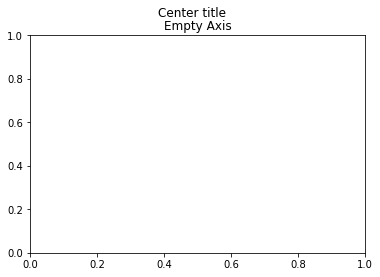

In [8]:
fig, ax = plt.subplots()
ax.set_title("Empty Axis")
fig.suptitle("Center title")

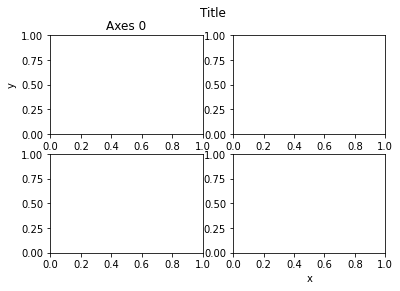

In [9]:
fig, axes_lst = plt.subplots(2, 2)
# 2x2 grid of Axes
fig.suptitle('Title')
axes_lst[0, 0].set_title('Axes 0')
axes_lst[0, 0].set_ylabel('y')
axes_lst[1, 1].set_xlabel('x')
plt.show()

(back to slides)

### Plotting DataFrames

In [11]:
df = df.sample(1000)
df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
21380,Lost in America,1985,Skippy,man,117,0.007164,NaN,NaN,8272
15507,Vantage Point,2008,Javier,man,177,0.045396,31.0,87.0,5183
16642,The Jungle Book,1967,Akela,man,110,0.015221,62.0,1029.0,5534
3766,The Abyss,1989,Lindsey Brigman,woman,4766,0.305474,31.0,118.0,1547
4648,Beloved,1998,Amy Denver,woman,1250,0.044191,16.0,42.0,1807
...,...,...,...,...,...,...,...,...,...
27,2001: A Space Odyssey,1968,Elena,woman,155,0.035219,37.0,376.0,625
6635,Frances,1982,Dick Steele,man,642,0.023880,38.0,14.0,2316
18746,Flags of Our Fathers,2006,Rene Gagnon,man,569,0.081228,27.0,44.0,7154
7809,Inventing the Abbotts,1997,Victor,man,170,0.008141,22.0,11.0,2629


<AxesSubplot:>

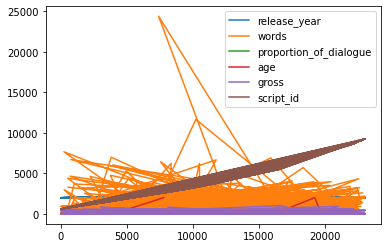

In [12]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

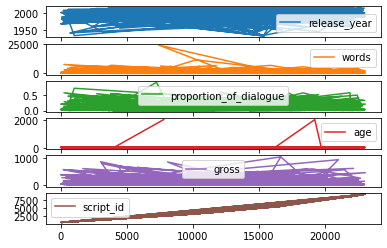

In [13]:
df.plot(subplots=True)

#### Types of charts

- scatter plot: identify associations between two numerical variables
- line graph: identify trends in one numerical variable as another increases. often used to see trends over time.
- bar chart: visualize the distribution of a categorical variable
- histogram: visualize the distribution of a numerical variable

**Question:**  Is there an association between the number of words a character has and the percentage of time they speek in the movie?

In [15]:
df.corr()

,release_year,words,proportion_of_dialogue,age,gross,script_id
release_year,1.000000,-0.032155,-0.066830,0.044731,-0.301586,0.119154
words,-0.032155,1.000000,0.739138,-0.040204,-0.024108,-0.043405
proportion_of_dialogue,-0.066830,0.739138,1.000000,-0.051116,-0.008993,0.063813
age,0.044731,-0.040204,-0.051116,1.000000,-0.026506,0.018305
gross,-0.301586,-0.024108,-0.008993,-0.026506,1.000000,-0.033349
script_id,0.119154,-0.043405,0.063813,0.018305,-0.033349,1.000000


<AxesSubplot:xlabel='words', ylabel='proportion_of_dialogue'>

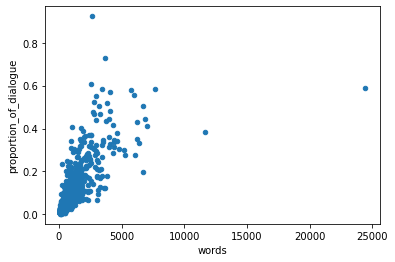

In [16]:
df.plot(kind='scatter', x='words', y='proportion_of_dialogue')

In [20]:
df.groupby(by='gender').mean()

,release_year,words,proportion_of_dialogue,age,gross,script_id
gender,,,,,,
man,1998.024638,839.246377,0.085401,50.04428,108.459552,4058.276812
woman,1999.241935,836.480645,0.077512,36.35200,97.203922,4259.883871


In [17]:
df.corr()

,release_year,words,proportion_of_dialogue,age,gross,script_id
release_year,1.000000,-0.032155,-0.066830,0.044731,-0.301586,0.119154
words,-0.032155,1.000000,0.739138,-0.040204,-0.024108,-0.043405
proportion_of_dialogue,-0.066830,0.739138,1.000000,-0.051116,-0.008993,0.063813
age,0.044731,-0.040204,-0.051116,1.000000,-0.026506,0.018305
gross,-0.301586,-0.024108,-0.008993,-0.026506,1.000000,-0.033349
script_id,0.119154,-0.043405,0.063813,0.018305,-0.033349,1.000000


**Question:** Is there a trend in the total number of words in each movie based on the year the movie came out?

In [34]:
movie_sums = pd.read_csv("data/Pudding-Film-Dialogue-Clean.csv").groupby('release_year').mean()
movie_sums

,words,proportion_of_dialogue,age,gross,script_id
release_year,,,,,
1929,1428.666667,0.166667,37.000000,NaN,4031.000000
1931,966.750000,0.166667,37.416667,298.000000,4183.916667
1932,1436.893617,0.085106,45.319149,NaN,2827.744681
1933,1056.250000,0.117949,42.631579,NaN,5155.500000
1934,1071.565217,0.086957,35.681818,NaN,5131.695652
...,...,...,...,...,...
2011,948.597390,0.083712,42.286649,59.342246,4286.641566
2012,800.588020,0.085575,42.578696,96.373093,4904.299511
2013,807.726236,0.091241,42.517668,72.400844,5677.866920


Text(0.5, 1.0, 'Totnal number of word in movies from each year')

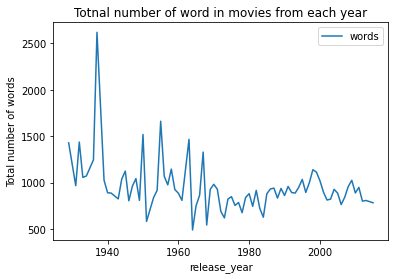

In [35]:
ax = movie_sums.reset_index().plot(kind='line', x='release_year', y='words')
ax.set_ylabel("Total number of words")
ax.set_title("Totnal number of word in movies from each year")

In [28]:
movie_sums.plot(kind='line', x='release_year', y='words')

KeyError: 'release_year'

In [ ]:
movie_sums

In [ ]:
df.plot(kind='line', x='release_year', y='words')

In [ ]:
df.sample(100).plot(kind='scatter', x='words', y='age')

In [ ]:
df['age'].describe()

In [ ]:
df['age'] > 2000

**Question:** Let's come up with a new question together

**Question:** Lets make a bar plot that shows the average number of words broken down by gender and age (old) movies.

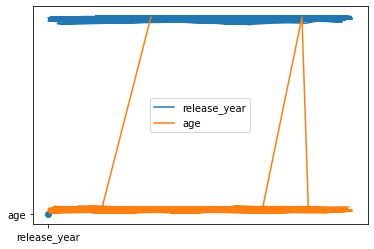

In [38]:
df[['release_year', 'age']].plot().scatter(x='release_year', y='age')

## Regex
.ipynb_checkpoints/table in pdf in other window)